# 1. 데이터셋 살펴보기

In [186]:
import os
import pandas as pd
import numpy as np

In [187]:
data_dir = '../../data/DRIVING-DATASET/Detection/'
data_df = pd.read_csv(os.path.join(data_dir, 'df.csv'))
data_df.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452


In [188]:
# 이미지 한개 살펴보기
index = 859
img_files = [fn for fn in os.listdir(os.path.join(data_dir,'images')) if fn.endswith('jpg')] #이미지들 리스트
img_file = img_files[index]
img_path = os.path.join(data_dir,'images' ,img_file)

In [189]:
img_path

'../../data/DRIVING-DATASET/Detection/images/566c8099bce5f4f0.jpg'

In [190]:
import cv2
import matplotlib.pyplot as plt

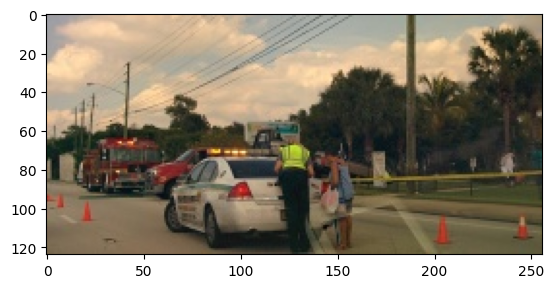

In [191]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [192]:
# 바운딩 박스 그리기

BOX_COLOR = {'Bus':(200, 0, 0), 'Truck':(0, 0, 200)}
CLASS_ID_TO_NAME = {0: 'Bus', 1: 'Truck'}

def visualize(image, bounding_boxes,class_ids,color=BOX_COLOR, thickness=2):
    
    for class_id, bounding_box in zip(class_ids,bounding_boxes): 
        class_name = CLASS_ID_TO_NAME[class_id]
        x_min, y_min, x_max, y_max = map(int,bounding_box) #정수의 값을 넣어야 그려짐

        
    
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=color[class_name], thickness=thickness)
        
        ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
        cv2.rectangle(image, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color[class_name], -1)
        cv2.putText(
            image,
            text=class_name,
            org=(x_min, y_min - int(0.3 * text_height)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.35, 
            color=(255,255,255), 
            lineType=cv2.LINE_AA,
        )
    return image

In [193]:
CLASS_NAME_TO_ID = {'Bus': 0, 'Truck': 1} # 버스, 트럭의 키값을 가진 딕셔너리 -> string의 classid를 수치화하기위함

In [194]:
# 이미지 그리기 위한 데이터
img_id = img_file.split('.')[0]
img_df = data_df[data_df['ImageID']==img_id]
class_names = img_df['LabelName'].values
class_ids = np.array([CLASS_NAME_TO_ID[class_name] for class_name in class_names])
bounding_box = img_df[["XMin", "XMax", "YMin", "YMax"]].values
bounding_box[:, [1,2]] = bounding_box[:, [2,1]]

In [195]:
class_names

array(['Truck', 'Truck'], dtype=object)

In [196]:
class_ids

array([1, 1])

In [197]:
# 이미지 크기에 따라서 노멀라이즈 되어있음, 이미지 크기를 곱해서 반환해서 사용해야함
bounding_box

array([[0.060625, 0.503866, 0.243125, 0.764175],
       [0.19625 , 0.554124, 0.470625, 0.770619]])

In [198]:
img_h, img_w, _ = img.shape

class_id = CLASS_NAME_TO_ID[class_names[0]]

# 노멀라이즈 되어있는 바운딩 박스의 좌표를 복원

bounding_box[:,[0,2]] *= img_w
bounding_box[:,[1,3]] *= img_h

In [199]:
bounding_box

array([[ 15.52    ,  62.479384,  62.24    ,  94.7577  ],
       [ 50.24    ,  68.711376, 120.48    ,  95.556756]])

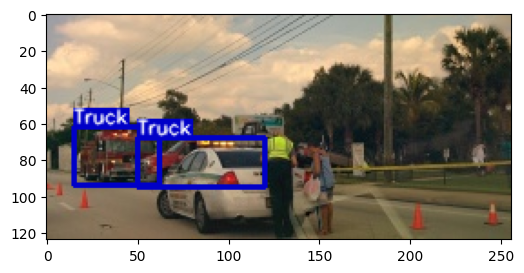

In [200]:
canvas = visualize(img, bounding_box, class_ids)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [201]:
# 인덱스별 이미지 확인
from ipywidgets import interact
img_files = [fn for fn in os.listdir(os.path.join(data_dir,'images')) if fn.endswith('jpg')] #이미지들 리스트

In [202]:
@interact(index=(0, len(img_files)-1))
def show_imgbox(index=1):
    img_file = img_files[index]
    img_path = os.path.join(data_dir, 'images',img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    

    img_id = img_file.split('.')[0]
    img_df = data_df[data_df['ImageID']==img_id]
    bounding_box = img_df[['XMin','XMax','YMin','YMax']].values
    bounding_box[:, [1,2]] = bounding_box[:, [2,1]]

    img_h, img_w, _ = img.shape
    bounding_box[:,[0,2]] *= img_w
    bounding_box[:,[1,3]] *= img_h   
    
    class_name = img_df['LabelName'].values
    class_ids = np.array([CLASS_NAME_TO_ID[class_name] for class_name in class_names])

    canvas = visualize(img, bounding_box, class_ids)
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=1, description='index', max=15224), Output()), _dom_classes=('widget-int…

# 2. 데이터 셋 및 데이터로더 구축

In [18]:
import torch
import numpy as np

In [19]:
class My_Dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.transformer = transformer

        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.img_files = [fn for fn in os.listdir(os.path.join(self.data_dir,phase)) if fn.endswith('jpg')]

        self.CLASS_NAME_TO_ID = {'Bus': 0, 'Truck': 1}
        
    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, index):
        #input = img
        #target = label(box, class_id)
        #get_image로 filename을 가지고오고 이것을 이용해 get_label로 box와 classid를 가져옴

        img, filename = self.get_img(index)
        boxes, class_ids = self.get_label(filename)

        img_h, img_w,_ = img.shape

        if self.transformer :
            img = self.transformer(img)
            _, img_h, img_w = img.shape #transformer에서 imgresize가 되었을수도있음

        boxes[:,[0,2]] *= img_w
        boxes[:,[1,3]] *= img_h

        target = {}
        target['boxes'] = torch.Tensor(boxes).float() #regression을 수행할것이라 float
        target["labels"] = torch.Tensor(class_ids).long() #int형

        return img, target, filename
        

    #getitem의 기능을 보충하기 위해서 생성
    def get_img(self, index):
        filename = self.img_files[index]

        img_path = os.path.join(self.data_dir,self.phase,filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        return img, filename

    def get_label(self, filename):
        img_id = filename.split('.')[0]
        img_df = self.data_df[self.data_df['ImageID']==img_id]
        boxes = img_df[['XMin','XMax','YMin','YMax']].values
        boxes[:, [1,2]] = boxes[:, [2,1]] # model [x_min, y_min, x_max, y_max] 포멧으로 받음

        class_names = img_df['LabelName'].values
        class_ids = np.array([self.CLASS_NAME_TO_ID[class_name] for class_name in class_names])

        return boxes,class_ids
        
        

In [20]:
data_dir = '../../data/DRIVING-DATASET/Detection/'
dataset = My_Dataset(data_dir, 'train')

dataset[0]

(array([[[3, 3, 3],
         [3, 3, 3],
         [4, 4, 4],
         ...,
         [8, 8, 6],
         [4, 4, 2],
         [4, 4, 2]],
 
        [[4, 4, 4],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [9, 9, 7],
         [4, 4, 2],
         [4, 4, 2]],
 
        [[4, 4, 4],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [9, 9, 7],
         [4, 4, 2],
         [4, 4, 2]],
 
        ...,
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [2, 2, 2],
         ...,
         [4, 4, 4],
         [5, 5, 5],
         [5, 5, 5]]], dtype=uint8),
 {'boxes': tensor([[ 66.4000, 105.4401, 208.1600, 153.4401]]),
  'labels': tensor([1])},
 '63908fdf1f3d13fe.jpg')

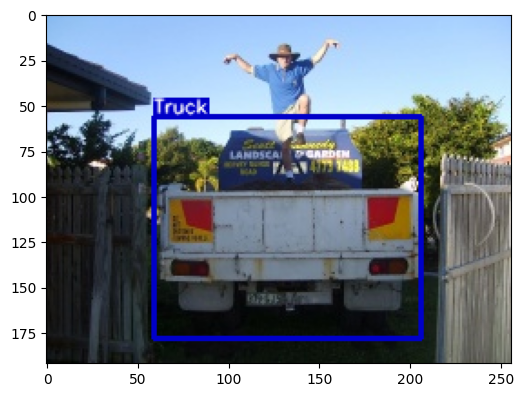

In [124]:
index = 5
image, target, filename = dataset[index]
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

canvas = visualize(image, boxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [22]:
from torchvision import transforms

In [23]:
IMG_SIZE = 448

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size = (IMG_SIZE,IMG_SIZE)),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [24]:
from torch.utils.data import DataLoader

In [25]:
def collate_fn(batch):
    img_list = []
    target_list = []
    filename_list = []

    for a,b,c in batch:
        img_list.append(a)
        target_list.append(b)
        filename_list.append(c)

    return img_list, target_list, filename_list

In [26]:
data_dir = '../../data/DRIVING-DATASET/Detection/'
BATCH_SIZE = 6

trainset = My_Dataset(data_dir=data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [27]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]

    print(len(images),len(targets), len(filenames))
    
    if index == 0:
        break

    

6 6 6


In [28]:
def My_DataLoader(data_dir,transfomer, batch_size=4):

    data_loaders = {}

    train_dataset = My_Dataset(data_dir, 'train', transformer)
    data_loaders['train'] = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, collate_fn = collate_fn)

    val_dataset = My_Dataset(data_dir, 'val', transformer)
    data_loaders['val'] = DataLoader(val_dataset, batch_size = 1, shuffle=False, collate_fn = collate_fn)

    return data_loaders

In [29]:
data_dir = '../../data/DRIVING-DATASET/Detection/'
dloaders = My_DataLoader(data_dir,transformer,batch_size=4)

for phase in ["train", "val"]:
    for index, batch in enumerate(dloaders[phase]):
        img = batch[0]
        targets = batch[1]
        filenames = batch[2]
        print(len(img),len(targets), len(filenames))
        
        if index == 0:
            break

4 4 4
1 1 1


# 3. Faster RCNN 모델 불러와서 사용하기

In [30]:
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor #모델 변경할 떄 사용

In [31]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True) #ResNet-50 아키텍처와 Feature Pyramid Network기반
model
#box_predictor 의 cls_score - class의 수, bbox_pred - class수 *4(사각형 꼭지점)

/opt/homebrew/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [32]:
in_features = model.roi_heads.box_predictor.cls_score.in_features # 기존의 input값
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2) #2 : 2개의 클래스로 변경

In [33]:
#변경 확인
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [34]:
def build_model(num_class):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)

    return model

In [35]:
model = build_model(2)

# 4. 학습코드 작성

In [36]:
#모델이 train모드일 때 list형태의 img와 target을 받으면 loss를 반환해줌(FasterRCNN내부에 손실 계산 기능이 있음)
 #eval모드일 때에는 image만 input으로 받음

In [37]:
phase = 'train'
model.train()

for index, batch in enumerate(dloaders[phase]):
    imgs = batch[0]
    targets = batch[1]
    filenames = batch[2]

    # 이미지, 타겟을 리스트로 (굳이x)
    imgs = list(img for img in imgs)
    targets = [{k: v for k, v in t.items()} for t in targets]

    loss = model(imgs, targets)

    if index == 0:
        break

    

In [38]:
#첫번째 스테이지단계에서 수행하는 CNN에 의한 loss
#loss_objectness : 어떤 대상에 대해서 분류를 하지 않고, regionproposal구간에 오브젝트가 있는지 없는지를 구분하는 loss
#loss_rpn_box_reg : Region Proposal Network에서 발견된 객체 후보들의 경계 상자regression box의 예측값과 Target 간의 차이를 측정
loss

{'loss_classifier': tensor(1.0683, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0357, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.3289, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0147, grad_fn=<DivBackward0>)}

In [39]:
# model이 train모드일때는 이미지와 타겟을 받아서 loss를 계산해줌, eval모드일 때는 이미지만 받아서 예측값을 반환해줌
# 아래 train_one_epoch에서는 모델을 val부분에서까지 train모드로 사용 - loss 계산을 위함
# 하지만 with torch.set_grad_enabled(phase == "train"): 부분과 if phase == "train":에서만 backward와 grad를 계산했기 때문에 train모드로 val을 진행해도
# grad가 갱신되지 않아 학습에 영향을 미치지 않음

In [40]:
from collections import defaultdict #매 에폭마다 loss를 담기 위해서 선언(존재하지 않는 키(key)에 접근하려고 할 때 에러가 발생하지 않고, 기본값을 반환)

In [41]:
def train_one_epoch(dataloaders, model, optimizer, device):#모델이 직접 loss를 구해서 criterion이 필요없음

    train_loss = defaultdict(float)
    val_loss = defaultdict(float)

    model.train()
    model.to(device)

    for phase in ['train', 'val']:
        for index, batch in enumerate(dataloaders[phase]):
            imgs = batch[0]
            targets = batch[1]
            filename = batch[2]

            imgs = [img.to(device) for img in imgs]
            targets = [{k:v.to(device) for k, v in t.items()} for t in targets]

            with torch.set_grad_enabled(phase=='train'): #train일 경우에만 loss로 grad를 구함
                losses = model(imgs, targets)
                total_loss = sum(loss for loss in losses.values())

                if phase == 'train' :
                    optimizer.zero_grad()
                    total_loss.backward()
                    optimizer.step()

                    if (index>0) and (index%VERBOSE_FREQ == 0) : 
                        text = f'{index}/{len(dataloaders[phase])} -'
                        for k,v in losses.items():
                            text +=f'{k} : {v.item():.4f}'
                        print(text)

                        for k,v in losses.items():
                            train_loss[k] += v.item()
                        train_loss['total_loss'] += total_loss.item() #backward되는 부분이 loss에 포함되어있어서 item을 붙여줘야함

                else : 
                    for k, v in losses.items():
                        val_loss[k] += v.item()
                    val_loss['total_loss'] += total_loss.item()

    for k in train_loss.key():
        train_loss[k] /= len(dataloaders['train'])
        val_loss[k] /= len(dataloaders['val'])

    return train_loss, val_loss         


In [43]:
data_dir = '../../data/DRIVING-DATASET/Detection/'
is_cuda = True

NUM_CLASSES = 2
IMAGE_SIZE = 448
BATCH_SIZE = 6
VERBOSE_FREQ = 30
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataloaders = My_DataLoader(data_dir,transformer,batch_size=4)
model = build_model(NUM_CLASSES)
model = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/opt/homebrew/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
def save_model(model_state, model_name, save_dir='./trained_model'):
    os.mkdir(save_dir, exist_ok=True)
    torch.save(model_state, os.path.join(save_dir,model_name))

In [63]:
num_epochs = 30

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss, val_loss = train_one_epoch(dataloaders, model, optimizer, DEVICE)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"epoch:{epoch+1}/{num_epochs} - Train Loss: {train_loss['total_loss']:.4f}, Val Loss: {val_loss['total_loss']:.4f}")
    
    if (epoch+1) % 10 == 0:
        save_model(model.state_dict(), f'model_{epoch+1}.pth')

30/3426 -loss_classifier : 0.0743loss_box_reg : 0.0769loss_objectness : 0.0181loss_rpn_box_reg : 0.0140
60/3426 -loss_classifier : 0.0787loss_box_reg : 0.0912loss_objectness : 0.0162loss_rpn_box_reg : 0.0083
90/3426 -loss_classifier : 0.0608loss_box_reg : 0.0832loss_objectness : 0.0167loss_rpn_box_reg : 0.0153
120/3426 -loss_classifier : 0.0446loss_box_reg : 0.0716loss_objectness : 0.0196loss_rpn_box_reg : 0.0046


KeyboardInterrupt: 

In [ ]:
tr_loss_classifier = [] 
tr_loss_box_reg = []
tr_loss_objectness = []
tr_loss_rpn_box_reg = []
tr_loss_total = []

for tr_loss in train_losses:
    tr_loss_classifier.append(tr_loss['loss_classifier'])
    tr_loss_box_reg.append(tr_loss['loss_box_reg'])
    tr_loss_objectness.append(tr_loss['loss_objectness'])
    tr_loss_rpn_box_reg.append(tr_loss['loss_rpn_box_reg'])
    tr_loss_total.append(tr_loss['total_loss'])

val_loss_classifier = [] 
val_loss_box_reg = []
val_loss_objectness = []
val_loss_rpn_box_reg = []
val_loss_total = []

for vl_loss in val_losses:
    val_loss_classifier.append(vl_loss['loss_classifier'])
    val_loss_box_reg.append(vl_loss['loss_box_reg'])
    val_loss_objectness.append(vl_loss['loss_objectness'])
    val_loss_rpn_box_reg.append(vl_loss['loss_rpn_box_reg'])
    val_loss_total.append(vl_loss['total_loss'])

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(tr_loss_total, label="train_total_loss")
plt.plot(tr_loss_classifier, label="train_loss_classifier")
plt.plot(tr_loss_box_reg,  label="train_loss_box_reg")
plt.plot(tr_loss_objectness, label="train_loss_objectness")
plt.plot(tr_loss_rpn_box_reg,  label="train_loss_rpn_box_reg")

plt.plot(val_loss_total, label="train_total_loss")
plt.plot(val_loss_classifier, label="val_loss_classifier")
plt.plot(val_loss_box_reg,  label="val_loss_box_reg")
plt.plot(val_loss_objectness, label="val_loss_objectness")
plt.plot(val_loss_rpn_box_reg,  label="val_loss_rpn_box_reg")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid("on")
plt.legend(loc='upper right')
plt.tight_layout()

# 5. Confidence threshold 와 Non-maximum suppression(NMS)적용

In [46]:
#모델 불러오는 함수
def load_model(ckpt_path, num_class, device):
    
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = build_model(num_class=num_class)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()

    return model

In [47]:
# 학습된 모델 불러오기
NUM_CLASSES = 2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data_dir = '../../data/DRIVING-DATASET/Detection/'

model = load_model(ckpt_path='./trained_model/model_30.pth', num_class=NUM_CLASSES,device=DEVICE)

/opt/homebrew/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [48]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [49]:
# 1개의 불러온 모델의 예측값에 대해 확인해보기 
for index, batch in enumerate(dataloaders['val']):
    imgs = batch[0]
    imgs = list(img.to(DEVICE) for img in imgs)

    with torch.no_grad():
        prediction = model(img)

    if index==0:
        break

In [50]:
prediction

[{'boxes': tensor([[259.3343, 128.3965, 431.2430, 339.3671],
          [  1.7069, 182.7455,  64.1945, 303.3607],
          [ 58.3615, 144.2746, 249.0624, 336.7854]]),
  'labels': tensor([1, 1, 1]),
  'scores': tensor([1.0000, 0.9999, 0.9999])}]

In [51]:
from torchvision.ops import nms

In [166]:
# 후처리함수
def postprocess(prediction, conf_threshold=0.2, IoU_threshold=0.1):
    pred_box = prediction['boxes'].cpu().detach() #detach() : Tensor의 그라디언트 계산을 멈추는 역할
    pred_label = prediction['labels'].cpu().detach()
    pred_score = prediction['scores'].cpu().detach()

    #conf_threchold
    valid_index_conf = pred_score>conf_threshold
    pred_box = pred_box[valid_index_conf]
    pred_label = pred_label[valid_index_conf]
    pred_score = pred_score[valid_index_conf]

    #nms_threshold
    #nms : box, score, IoU_threshold를 받음,
    #box좌표 : x1, y1, x2, y2로 들어감(FasterRCNN은 xmin,ymin, xmax,ymax의 순으로 박스를 반환해줘서 그대로 사용 가능)
    valid_index_nms = nms(pred_box, pred_score, IoU_threshold)
    pred_box = pred_box[valid_index_nms].numpy() # 이미지 그리기 위해서 numpy로 변환
    pred_label = pred_label[valid_index_nms].numpy()
    pred_score = pred_score[valid_index_nms].numpy()


    ##np.newaxis : 배열의 차원을 하나 늘려주는 역할 -> pred_box에 맞춰주기 위해서 나머지를 한차원씩 늘려줌
    return np.concatenate((pred_box,pred_score[:, np.newaxis], pred_label[:, np.newaxis]), axis=1)

    
    
    

In [147]:
#np.newaxis 예시
        # # 1차원 배열
        # arr_1d = np.array([1, 2, 3])
        
        # # 1차원 배열을 2차원으로 확장
        # arr_2d = arr_1d[:, np.newaxis]
        
        # print(arr_2d.shape)  # 출력: (3, 1)
        
        # # 2차원 배열
        # arr_2d = np.array([[1, 2, 3]])
        
        # # 2차원 배열을 3차원으로 확장
        # arr_3d = arr_2d[:, :, np.newaxis]
        
        # print(arr_3d.shape)  # 출력: (1, 3, 1)

In [152]:
# predictrion 확인
for index, batch in enumerate(dataloaders['val']):
    imges = batch[0]
    img = [img.to(DEVICE)for img in imges]

    with torch.no_grad():
        prediction = model(img)

    prediction = postprocess(prediction[0])

    if index==0:
        break


In [153]:
prediction # box, score, label의 순서로 

array([[259.33432007, 128.39654541, 431.24298096, 339.36706543,
          0.999951  ,   1.        ],
       [  1.70687163, 182.74549866,  64.19448853, 303.36071777,
          0.99992836,   1.        ],
       [ 58.36150742, 144.27464294, 249.06239319, 336.78536987,
          0.99987411,   1.        ]])

In [151]:
from torchvision.utils import make_grid

In [224]:
# 예측하기
pred_imgs = []
pred_labels = []

for index, batch in enumerate(dataloaders['val']):
    imgs = batch[0]
    img = [img.to(DEVICE)for img in imgs]

    with torch.no_grad():
        prediction = model(img)

    prediction = postprocess(prediction[0])

    # 예측된 상자의 크기가 이미지의 크기보다 큰것을 방지
    # clip : 배열의 요소가 최솟값보다 작으면 최솟값으로, 최댓값보다 크면 최댓값으로 설정
    # xmax와 ymax를 제한
    prediction[:,2].clip(min = 0, max = imgs[0].shape[1])
    prediction[:,3].clip(min = 0, max = imgs[0].shape[0])

    pred_imgs.append(imgs[0])
    pred_labels.append(prediction)

    if index==30:
        break

In [263]:
# 예측값 이미지로 살펴보기
@interact(index=(0, len(pred_imgs)-1))
def show_predict(index=0):
    int_labels = pred_labels[index][:, 5].astype(int)

    # 기존의 예측 이미지가 normalization되어있어서 색감이 이상함, 
    # make_grid의 normalize를 이용하면 pred_imgs[index]의 내부의 값을 0~1사이의 값으로 재조정
    # 이에 255를 곱해줘서 원래의 색감으로 돌아옴
    image = make_grid(pred_imgs[index], normalize=True).permute(1,2,0).numpy() 
    image = (image * 255).astype(np.uint8) #imshow가능하도록
    img = image.copy()
    
    result = visualize(img, pred_labels[index][:, 0:4], int_labels)
    
    plt.figure(figsize=(6,6))
    plt.imshow(result)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=30), Output()), _dom_classes=('widget-intera…